In [45]:
import pandas as pd
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
source_file = "BeerDataScienceProject.csv"
chart_folder ='charts'
output_dir = 'chart_folder/'

In [3]:
from pathlib import Path
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [4]:
df = pd.read_csv(source_file,encoding='latin-1')

In [5]:
df.head(1)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823


In [6]:
df.shape

(528870, 13)

In [7]:
print("types of each columns: \n\n",df.dtypes)
print("\ninformation of the columns: \n")
print(df.info())

types of each columns: 

 beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

information of the columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528

In [8]:
print("Count of unique breweries, by brewery_id: " ,df.beer_brewerId.nunique())
print("Count of unique breweries, by brewery_name: " ,df. beer_name.nunique())

Count of unique breweries, by brewery_id:  1803
Count of unique breweries, by brewery_name:  18339


In [9]:
print("Count of unique beers, by beer_id: " ,df.beer_beerId.nunique())

Count of unique beers, by beer_id:  20200


In [10]:
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [11]:
print(f"shape of data before drop:{df.shape}")

shape of data before drop:(528870, 13)


In [12]:
print('Percent of Null Values in beer_ABV column', round(20280/528870 *100, 2),"%")

Percent of Null Values in beer_ABV column 3.83 %


In [13]:
df =df.dropna()
print(f"shape of data after drop:{df.shape[0]}")

shape of data after drop:508358


In [ ]:
# subset = df[['review_profileName','beer_name']]
# subset['concat_profilename_beername']= df['review_profileName']+df['beer_name']
# subset.describe()

In [14]:
print("Percent of Duplicate Values that will be removed from dataset:", round(508358 - 502769)/ 1518478 * 100,"%" )

Percent of Duplicate Values that will be removed from dataset: 0.36806591863695093 %


In [15]:
df = df[(df['review_overall']>=1) | (df['review_appearance']>=1)]
print(f"shape of data after drop:{df.shape[0]}")

shape of data after drop:508355


In [16]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508355.00,508355.00,508355.00,508355.00,508355.00,508355.00,508355.00,508355.00,508355.00
mean,7.02,21824.23,2534.28,3.87,3.77,3.84,3.78,3.83,1226176342.04
std,2.20,22124.99,5237.86,0.60,0.68,0.71,0.67,0.72,75307150.64
min,0.01,5.00,1.00,1.00,1.00,1.00,1.00,1.00,884390401.00
25%,5.30,1673.00,132.00,3.50,3.50,3.50,3.50,3.50,1177202481.00
50%,6.50,13850.00,392.00,4.00,4.00,4.00,4.00,4.00,1241505174.00
75%,8.50,40418.00,1315.00,4.00,4.00,4.50,4.00,4.50,1289073655.00
max,57.70,77310.00,27980.00,5.00,5.00,5.00,5.00,5.00,1326276656.00


# Rank top 3 Breweries which produce the strongest beers?

by alcohol beverage percent

In [17]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [18]:
df.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [ ]:
df.head()

array([[<AxesSubplot:title={'center':'beer_ABV'}>,
        <AxesSubplot:title={'center':'beer_beerId'}>,
        <AxesSubplot:title={'center':'beer_brewerId'}>],
       [<AxesSubplot:title={'center':'review_appearance'}>,
        <AxesSubplot:title={'center':'review_palette'}>,
        <AxesSubplot:title={'center':'review_overall'}>],
       [<AxesSubplot:title={'center':'review_taste'}>,
        <AxesSubplot:title={'center':'review_aroma'}>,
        <AxesSubplot:title={'center':'review_time'}>]], dtype=object)

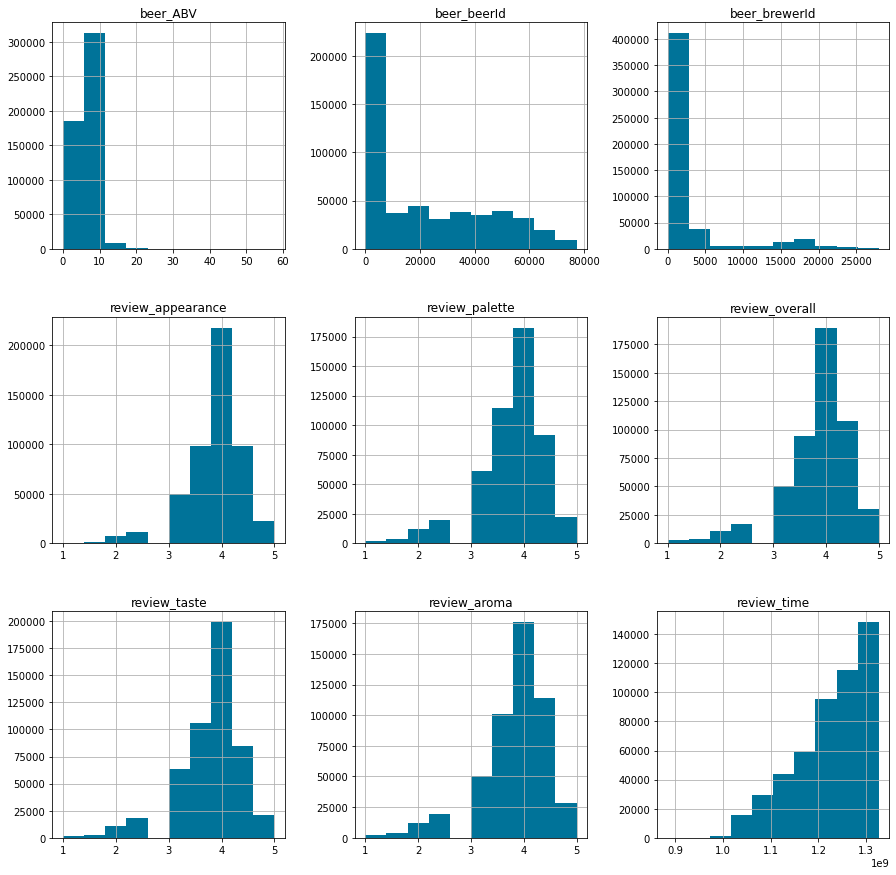

In [19]:
df.hist(figsize=(15,15),color='#007399')

1.beer_ABV(right long-tailed distribution),most of the beers are less than 20% abv.
2.review_appearance (normal distribution), most beers are rated between 3.5 and 4.5.
3.review_aroma (normal distribution), most beers are rated between 3.5 and 4.5.
4.review_plate (normal distribution), most beers are rated between 3.5 and 4.5.
5.review_taste (normal distribution), most beers are rated between 3.5 and 4.5.
6.review_overall (normal distribution), As review_overall is the mean of review_appearance, review_aroma, review_plate and 7.review_taste, the overall rate of beers are between 3.5.to 4.5
8.beer_beerid (right long-tailed distribution), beers with lower id own more reviews.


In [51]:
fig = px.bar(x=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True),
             y=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True).index,
             text=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True).index,color =df.beer_brewerId.value_counts().head(10).sort_values(ascending=True).index,)
fig.update_layout(title='popular Breweries',
                   xaxis_title='review count ',
                   yaxis_title='Brewery Id')
fig.update_yaxes(type='category')
fig.show()
fig.write_html(output_dir +"top_brw_pop.html")

In [54]:
brewery_type

,beer_brewerId,beer_name
0,1,13
1,3,40
2,5,8
3,10,4
4,14,124
...,...,...
1602,27870,3
1603,27879,1
1604,27917,1
1605,27922,2


In [59]:
brewery_type = df.groupby('beer_brewerId')
brewery_type = brewery_type.agg({"beer_name":"nunique"})
brewery_type = brewery_type.reset_index()
fig=px.bar(brewery_type,x=brewery_type.sort_values(by="beer_name",ascending=False).head(10).sort_values(by="beer_name",ascending=True).beer_name,
              y=brewery_type.sort_values(by="beer_name",ascending=False).head(10).sort_values(by="beer_name",ascending=True).beer_brewerId,
           text=brewery_type.sort_values(by="beer_name",ascending=False).head(10).sort_values(by="beer_name",ascending=True).beer_brewerId)
fig.update_layout(title="Top 10 brewery with the most beer types",
                       yaxis_title='beer_brewerId',
                       xaxis_title='count of beer styles',title_x= 0.5)
fig.show()
fig.write_html(output_dir +"top_brew_beerimp.html")

In [35]:
Top_3_beers_by_abv = df [['beer_name','beer_brewerId','beer_ABV']]\
                        .sort_values('beer_ABV', ascending = False)\
                        .drop_duplicates('beer_brewerId')\
                        .head(3)\
                        .sort_values('beer_name', ascending = True)


fig = px.bar(Top_3_beers_by_abv, 
             x='beer_name', 
             y='beer_ABV',
             color ='beer_name', 
             title ='Top 3 Beers by ABV',
             labels={'beer_ABV':'Alchohol Beverage Percent','beer_name':'Beer Name'}, 
             height=500, 
             text = Top_3_beers_by_abv['beer_brewerId'])
fig.show()
fig.write_html(output_dir +"top_beers by ABV.html")

In [36]:
fig = px.bar(Top_3_beers_by_abv, x='beer_name',y='beer_ABV',color = 'beer_brewerId',title='Top breweries by beer name')
fig.show()
fig.write_html(output_dir +"top3_beers by ABV.html")

In [37]:
fig = px.bar(Top_3_beers_by_abv, 
             x='beer_brewerId', 
             y='beer_ABV',
             color ='beer_ABV',
             title ='Top 3 BrewerId by beer_ABV')
fig.update_xaxes(type='category')
fig.show()
fig.write_html(output_dir +"top3_brwIds by ABV.html")

# By Highest Mean,Median ABV

In [38]:
abv = df[['beer_name','beer_brewerId','beer_ABV']]\
    .drop_duplicates(['beer_name','beer_brewerId'])\
    .pivot_table(index="beer_brewerId", aggfunc=("count",'mean','median'))

# Adjust column names
abv.columns = abv.columns.to_series().str.join('_')

# Reset index
abv.reset_index(inplace=True)

# Rename column
abv.rename(columns={'beer_ABV_count':'beer_count'}, inplace=True)

# Filter for breweries with at least 4 unique beers
abv_filtered_mean = abv.query('beer_count >= 4')\
    .sort_values('beer_ABV_mean', ascending=False)\
    .head(10)\
    .sort_values('beer_ABV_mean', ascending=True)

C:\Users\gazal\AppData\Local\Temp/ipykernel_17444/1764222385.py:1: FutureWarning:

['beer_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [39]:
abv_filtered_mean

,beer_brewerId,beer_count,beer_ABV_mean,beer_ABV_median
313,1675,27,8.929630,9.00
1315,20417,63,9.000794,9.00
1193,16866,143,9.027762,8.50
516,3704,9,9.144444,8.00
448,2958,30,9.250333,8.00
200,881,6,9.633333,9.00
1383,22202,10,9.675000,8.65
209,931,4,9.825000,9.15
73,396,52,10.165769,11.00
699,6513,10,24.690000,16.00


In [40]:
abv_filtered_mean=abv_filtered_mean.sort_values(by='beer_ABV_mean',ascending=False)
# abv_filtered_mean=abv_filtered_mean.head(5)

In [ ]:
abv_filtered_mean

In [41]:
fig = px.bar(x=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True),
             y=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True).index,
             text=df.beer_brewerId.value_counts().head(10).sort_values(ascending=True).index,)
fig.update_layout(title='popular Breweries',
                   xaxis_title='review count ',
                   yaxis_title='Brewery Id')
fig.show()
fig.write_html(output_dir +"top_brw_pop.html")

In [43]:
fig = px.bar(abv_filtered_mean, x='beer_brewerId',y='beer_ABV_mean',color = 'beer_brewerId',title='Top 3 Breweries by Highest Mean ABV',
             text=abv_filtered_mean['beer_ABV_mean'].round(1),)
fig.update_xaxes(type='category')
fig.update_layout(title="Top 5 Breweries by Highest Mean ABV",
                   xaxis_title='beer_brewerId',
                   yaxis_title='ABV Mean',title_x= 0.5)
fig.show()
fig.write_html(output_dir +"top5_brwIds_mean by ABV.html")

In [61]:
p1 = [go.Bar(x = abv_filtered_mean['beer_ABV_mean'] / 100,
             y = abv_filtered_mean['beer_brewerId'],
             text=abv_filtered_mean['beer_ABV_mean'].round(1),
             hoverinfo='x',
             textposition = 'inside',
             orientation = 'h',
             opacity=0.7)]

# Pieces of Flair
layout = go.Layout(title='Top Breweries by Highest Mean ABV',
                   xaxis=dict(title="Mean ABV",
                              tickformat='%',
                              hoverformat = '.2%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',color='gray'))

fig = go.Figure(data=p1, layout=layout)
fig.update_yaxes(type='category')

fig.show()
fig.write_html(output_dir +"topbrwIds_mean .html")

In [63]:
abv_filtered_median = abv.query('beer_count >= 4')\
    .sort_values('beer_ABV_median', ascending=False)\
    .head(10)\
    .sort_values('beer_ABV_median', ascending=True)
fig = px.bar(abv_filtered_median, 
             y='beer_ABV_median', 
             x='beer_brewerId', 
             color = 'beer_ABV_median',
             title ='Top 10 BrewdId by ABV',
             labels={'beer_ABV':'Alchohol Beverage Percent','beer_name':'Beer Name'}, 
             height=500)
fig.update_xaxes(type='category')
fig.show()
fig.write_html(output_dir +"topbeers .html")

In [64]:
abv_filtered_median = abv.query('beer_count >= 4')\
    .sort_values('beer_ABV_median', ascending=False)\
    .head(10)\
    .sort_values('beer_ABV_median', ascending=True)

# Plot it
p2 = [go.Bar(x = abv_filtered_median['beer_ABV_median'] / 100,
            y = abv_filtered_median['beer_brewerId'],
            hoverinfo='x',
            text=abv_filtered_median['beer_ABV_median'].round(1),
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Top 10 Breweries by Highest Median ABV',
                   xaxis=dict(title="Median ABV",
                              tickformat="%",
                              hoverformat = '.2%'),
                   margin = dict(l = 230),
                   font=dict(family='Courier New, monospace',
                            color='black'))

fig = go.Figure(data=p2, layout=layout)

fig.update_yaxes(type='category')

fig.show()
fig.write_html(output_dir +"topbrwIds_med .html")

Top 10 Beers by ABV

In [65]:
df['beer_brewerId'] = df['beer_brewerId'].astype(str).str.replace('.', '')

C:\Users\gazal\AppData\Local\Temp/ipykernel_17444/150053065.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [66]:
Top_10_beers_by_abv = df [['beer_name','beer_brewerId','beer_ABV']]\
                        .sort_values('beer_ABV', ascending = False)\
                        .drop_duplicates('beer_name')\
                        .head(10)\
                        .sort_values('beer_ABV', ascending = True)


fig = px.bar(Top_10_beers_by_abv, 
             x='beer_ABV', 
             y='beer_name', 
             title ='Top 10 Beers by ABV',
             labels={'beer_ABV':'Alchohol Beverage Percent','beer_name':'Beer Name'}, 
             height=500, 
             text = Top_10_beers_by_abv['beer_brewerId'])
fig.show()
fig.write_html(output_dir +"topbeers .html")

# Which year did beers enjoy the highest ratings? 

In [ ]:
#convert to datetime

In [67]:
df.review_time = pd.to_datetime (df.review_time,unit = 's')
df.head(1)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03


In [68]:
time=df["review_time"].groupby(df.review_time.dt.year).agg('count')
fig = go.Figure(data=go.Scatter(x=time.index, y=time.values))
fig.update_layout(title='The time-series line chart of reviews',
                   xaxis_title='Date',
                   yaxis_title='Count of reviews')
fig.show()
fig.write_html(output_dir +"review_count_yearly.html")

In [69]:
df["Date"] =pd.to_datetime(df['review_time'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
df["year"] =pd.to_datetime(df['review_time'], errors='coerce', utc=True).dt.strftime('%Y')
dftwo=df[['Date','year','review_overall','beer_name']].copy()

In [ ]:
dftwo.head()

In [70]:
sorted_dftwo=dftwo.groupby(['year'],as_index=False).count()

In [ ]:
sorted_dftwo

In [71]:
beer_cnt = df.groupby('beer_name').apply(lambda x:x['beer_name'].count()).reset_index(name='Counts')
beer_cnt.sort_values(by='Counts',ascending=False,inplace=True)
Top_20_cnt = beer_cnt[0:20]

fig=px.bar(Top_20_cnt,x='beer_name',y='Counts',color='Counts',title='Beers with highest number of reviews')
fig.show()
fig.write_html(output_dir +"beers_higest_review.html")

In [72]:
import numpy as np
cnt_best_avg1 = df.groupby('beer_name').apply(lambda x:np.average(x['review_overall'])).reset_index(name='Overall Ratings')
cnt_best_cnt1 = df.groupby('beer_name').apply(lambda x:x['review_overall'].count()).reset_index(name='Beer Name Review Counts')
snt_best_avg_cnt1 = pd.merge(cnt_best_avg1,cnt_best_cnt1, how='inner',left_on='beer_name',right_on='beer_name')
sel_best_avg_cnt1 = snt_best_avg_cnt1[snt_best_avg_cnt1['Beer Name Review Counts']>=200]
sel_best_avg_cnt1.sort_values(by=['Overall Ratings','Beer Name Review Counts'],ascending =[False, False])
fig = px.scatter(sel_best_avg_cnt1,x='Overall Ratings',y='Beer Name Review Counts',color='Beer Name Review Counts',size='Overall Ratings',hover_data=['beer_name'],title='Beer Name Counts and Average Rating')
fig.show()
fig.write_html(output_dir +"beers_avg rating.html")

In [ ]:
df.head(2)

In [73]:
avg_year_rating = df.groupby('year').apply(lambda x:np.average(x['review_overall'])).reset_index(name='Overall Ratings')
# cnt_best_cnt2 = df.groupby('year').apply(lambda x:x['review_overall'].count()).reset_index(name='Beer Name Review Counts')

In [ ]:
avg_year_rating.head()

In [74]:
fig = px.bar(avg_year_rating, y = "year", x = "Overall Ratings", color='year')
fig.show()
fig.write_html(output_dir +"year_highest_rating1.html")

In [75]:
fig = px.line(avg_year_rating, x = "year", y = "Overall Ratings", color='year',markers=True)
fig.show()
fig.write_html(output_dir +"year_highest_rating.html")

In [ ]:
df.head(1)

In [ ]:
new_df = df.sort_values(by ="review_time",ascending=False)
new_df.tail()

In [76]:
from pandas import Series
import matplotlib as mpl
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
# mpl.style.use('dark_background')
mpl.style.use('seaborn-white')

def f(x):
     return Series(dict(Number_of_reviews = x['review_text'].count(),))

In [77]:
df['Datetime'] = pd.to_datetime(df['review_time'])

In [78]:
df = df.set_index(['Datetime'])
df.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Date,year
Datetime,,,,,,,,,,,,,,,
2009-02-16 20:57:03,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,2009-02-16,2009
2009-03-01 13:44:57,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57,2009-03-01,2009


In [157]:
reviews = df.groupby('beer_beerId').agg({
                                            'review_overall': np.mean,
                                            'review_aroma': np.mean,
                                            'review_appearance': np.mean,
                                            'review_palette': np.mean,     
                                            'review_taste': np.mean,
                                            'beer_ABV': np.mean
                                        })
top_reviews = pd.DataFrame(reviews.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
highest_review = pd.merge(df[['year','beer_beerId']],top_reviews[:1],on='beer_beerId') 
highest_review

,year,beer_beerId,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV
0,2002,1734,5.0,5.0,5.0,5.0,5.0,10.0


In [158]:

fig = go.Figure(data=[go.Table(
        header=dict(values=list(highest_review.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[highest_review.year,highest_review.beer_beerId,highest_review.review_overall,
                           highest_review.review_aroma,highest_review.review_appearance,highest_review.review_palette,
                           highest_review.review_taste,
                           highest_review.beer_ABV],
                   fill_color='lavender',
                   align='left'))
    ])
    
fig.show()
fig.write_html(output_dir +"highest_rev_year.html")

In [151]:
print("Year : ",highest_review['year'].to_string(index=False))

Year :  2002


In [79]:
daily_count = df.groupby(df.index.date).apply(f)
print (len(daily_count))
daily_count.head(5)

3863


,Number_of_reviews
1998-01-10,1
1998-02-06,1
1998-03-02,1
1998-03-06,1
1998-06-23,1


In [80]:
weekday_count = df.groupby(df.index.weekday).apply(f)

In [81]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days

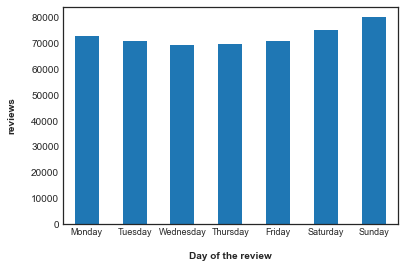

In [82]:
day_of_week_plot = weekday_count['Number_of_reviews'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 


day_of_week_plot.set_xlabel('Day of the review', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
day_of_week_plot.set_ylabel('reviews', weight='bold', labelpad=15) 

savefig(output_dir +'day-of-week counts.png', bbox_inches='tight', dpi=300, format='png')

In [83]:
hourly_count = df.groupby(df.index.hour).apply(f)
print (len(hourly_count))
# hourly_count

24


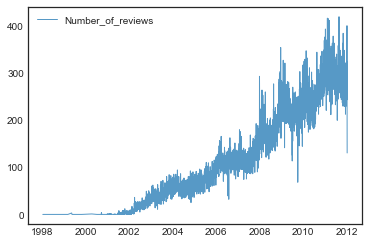

In [84]:
daily_plot = daily_count['Number_of_reviews'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

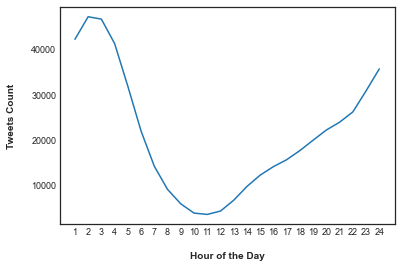

In [85]:

hourly_plot = hourly_count['Number_of_reviews'].plot(kind='line')
hours = list(range(1,25))                                                #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('Tweets Count', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig(output_dir +'hourly counts - line graph.png', bbox_inches='tight', dpi=300, format='png')

In [86]:
second_count = df.groupby(df.index.second).apply(f)
print (len(second_count))
# second_count.head()

60


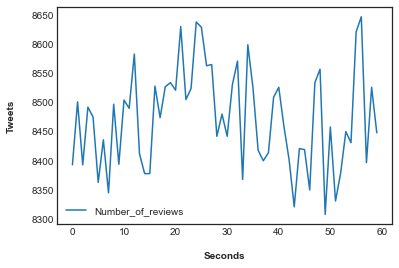

In [87]:
second_plot = second_count.plot()
second_plot.set_xlabel('Seconds', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
second_plot.set_ylabel('Tweets', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL
#SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL
savefig(output_dir + 'tweets per second.png', bbox_inches='tight', dpi=300, format='png')

# Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

# Correlation Features

In [ ]:
df.tail(1)

In [88]:
import plotly.figure_factory as ff
corr= df[["review_appearance","review_aroma","review_palette","review_taste", "review_overall"]].corr()
corr
x=list(corr.index)
y=list(corr.columns)

fig = ff.create_annotated_heatmap(x=x,y=y,z=corr.values.round(2),colorscale=[[0, 'navy'], [1, 'plum']],font_colors = ['white', 'black'])

fig.show()
fig.write_html(output_dir +"rating_heatmap.html")

The lighter the color, the higher the correlation between the two features.
review_aroma has the highest correlation with review_overall, at 0.78, followed by review_taste, at 0.69.

# Linear Model

In [89]:
df1 = df[["review_appearance","review_aroma","review_palette","review_taste", "review_overall"]]
df1.head()

,review_appearance,review_aroma,review_palette,review_taste,review_overall
Datetime,,,,,
2009-02-16 20:57:03,2.5,1.5,2.0,1.5,1.5
2009-03-01 13:44:57,3.0,3.0,2.5,3.0,3.0
2009-03-01 14:10:04,3.0,3.0,2.5,3.0,3.0
2009-02-15 19:12:25,3.5,3.0,3.0,2.5,3.0
2010-12-30 18:53:26,4.0,4.5,4.5,4.0,4.0


In [90]:

X = df1.drop('review_overall', axis=1)
y = df['review_overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# pip install xgboost

In [91]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
print(model.feature_importances_)
# score = model.score(X_test, y_test)

[0.01292951 0.8775455  0.01372598 0.0957991 ]


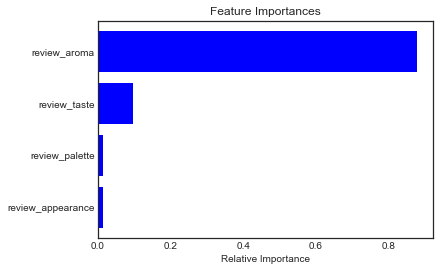

In [92]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [93]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

In [94]:
feature_name = [features[i] for i in indices]

In [95]:
feature_name

['review_appearance', 'review_palette', 'review_taste', 'review_aroma']

In [96]:
feature_wt =importances[indices]

In [ ]:
feature_wt

In [ ]:
print([features[i] for i in indices])

In [ ]:
print(importances[indices])

In [97]:

fig=px.bar(x=feature_wt,y=feature_name,title='Feature Importances',color = [features[i] for i in indices])
fig.update_layout(title="Features Importances",
                       yaxis_title='features',
                       xaxis_title='Relative importance',title_x= 0.5)
fig.show()
fig.write_html(output_dir +"feature_imp.html")

C:\Users\gazal\anaconda3\lib\site-packages\xgboost\core.py:90: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



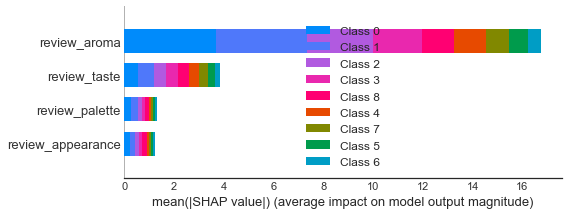

In [98]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Observe that to taste the best quality beer anywhere around the world then checking highest number of reviews for the beer style or the brewery name, is not the only one point to be considered. The features which plays the major factor in choosing the best beer are 'review_Aroma'.

# If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

Simple recommendation based on the highest overall average rating with reviews more than 1000

In [99]:
top_3_rec = df[['beer_name','beer_style','review_overall']]\
    .pivot_table(index=["beer_name",'beer_style'], aggfunc=("count",'mean','median'))\
    .dropna()

# Rename columns and flatten pivot table
top_3_rec.columns = top_3_rec.columns.to_series().str.join('_')
top_3_rec.reset_index(inplace=True)

# Filter for highest rated beers
top_3_rec = top_3_rec.query('review_overall_count >= 1000')\
  .sort_values('review_overall_mean', ascending=False)\
  .head(3)

# Check it out
top_3_rec

,beer_name,beer_style,review_overall_count,review_overall_mean,review_overall_median
4746,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,1928,4.396266,4.5
13087,Tröegs Nugget Nectar,American Amber / Red Ale,1953,4.396057,4.5
4699,Founders Breakfast Stout,American Double / Imperial Stout,2501,4.354658,4.5


In [100]:
fig = px.funnel(top_3_rec, x='review_overall_mean', y='beer_name')
fig.show()
fig.write_html(output_dir +"3beer_recomm.html")

In [101]:
top_rated=top_3_rec.sort_values(by='review_overall_mean',ascending=False)
fig =px.sunburst(
    top_rated,
    path=['beer_name','beer_style'],
    values='review_overall_mean',
    color='review_overall_count')
fig.show()
fig.write_html(output_dir +"beer_recomm.html")

C:\Users\gazal\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\gazal\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df.head()

In [106]:
# Aggregate count & mean for relevant variables
aro_appear_name = df[['beer_name','review_aroma', 'review_taste','review_palette']]\
    .pivot_table(index="beer_name", aggfunc=('count','mean'))

# Flatten pivot table
aro_appear_name.columns = aro_appear_name.columns.to_series().str.join('_')
aro_appear_name.reset_index(inplace=True)

# Remove redundant '_count' columns
aro_appear_name.drop(list(aro_appear_name.filter(regex = 'count')), 
                      axis = 1, 
                      inplace = True)

#aro_appear = aro_appear.drop(['review_appearance_count', 
                                         # 'review_aroma_count'], axis=1)

# Add average of combined aroma and appearance 
aro_appear_name['aroma_appear_mean'] = (aro_appear_name['review_taste_mean'] + 
                              aro_appear_name['review_aroma_mean']) / 2

# Add absolute average distance from mean 
aro_appear_name['diff_from_mean'] = abs(aro_appear_name['review_taste_mean'] - aro_appear_name['review_aroma_mean'])

# Sort for plotly 
sort_aro_appear_name = aro_appear_name.sort_values('aroma_appear_mean', ascending=False)\
                    .head(10)\
                    .sort_values('aroma_appear_mean',ascending=True)

# Aroma-Appearance Dumbbell Plot Workaround
p1 = go.Scatter(
    x = sort_aro_appear_name['aroma_appear_mean'],
    y = sort_aro_appear_name['beer_name'],
    error_x = dict(
        type='data',
        array=sort_aro_appear_name['diff_from_mean']/2,
        thickness=1.5),
    mode = 'markers',
    name = 'Combined Average',
    marker=dict(
        color='rgba(84, 110, 122, 0.95)',
        line=dict(
            color='rgba(84, 110, 122, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Aroma Rating Dot Plot 
p2 = go.Scatter(
    x = sort_aro_appear_name['review_aroma_mean'],
    y = sort_aro_appear_name['beer_name'],
    mode = 'markers',
    name = 'Aroma Average',
    marker=dict(
        color='rgba(229, 57, 53, 0.95)',
        line=dict(
            color='rgba(229, 57, 53, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Appearance Rating Dot Plot
p3 = go.Scatter(
    x = sort_aro_appear_name['review_taste_mean'],
    y = sort_aro_appear_name['beer_name'],
    mode = 'markers',
    name = 'Taste Average',
    marker=dict(
        color='rgb(1, 87, 155, 0.95)',
        line=dict(
            color='rgba(1, 87, 155, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)


# Set layout
layout=dict(
    title='Top 10 Beer Names by Combined Taste/Aroma Average',
    xaxis=dict(
        showline=True,
        showticklabels=True,
        ticks='outside',
        title='Rating',
        hoverformat = '.2f',
        autorange=True,
        showgrid=False,),
    margin = dict(l = 250),
    font=dict(family='Courier New, monospace', color='dark gray'),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='bottom',
        xanchor='right',
    ),
    hovermode='closest'
)


# Plot it
fig = go.Figure(data=[p1,p2,p3], layout=layout)
fig.show()
fig.write_html(output_dir +"beer_name_cobtaste.html")
# py.offline.iplot(fig)

In [107]:
# Aggregate count & mean for relevant variables
aro_appear = df[['beer_style','review_aroma', 'review_taste','review_overall']]\
    .pivot_table(index="beer_style", aggfunc=('count','mean'))

# Flatten pivot table
aro_appear.columns = aro_appear.columns.to_series().str.join('_')
aro_appear.reset_index(inplace=True)

# Remove redundant '_count' columns
aro_appear.drop(list(aro_appear.filter(regex = 'count')), 
                      axis = 1, 
                      inplace = True)

#aro_appear = aro_appear.drop(['review_appearance_count', 
                                         # 'review_aroma_count'], axis=1)

# Add average of combined aroma and appearance 
aro_appear['aroma_appear_mean'] = (aro_appear['review_taste_mean'] + 
                              aro_appear['review_aroma_mean']) / 2

# Add absolute average distance from mean 
aro_appear['diff_from_mean'] = abs(aro_appear['review_taste_mean'] - aro_appear['review_aroma_mean'])

# Sort for plotly 
sort_aro_appear = aro_appear.sort_values('aroma_appear_mean', ascending=False)\
                    .head(10)\
                    .sort_values('aroma_appear_mean',ascending=True)

# Aroma-Appearance Dumbbell Plot Workaround
p1 = go.Scatter(
    x = sort_aro_appear['aroma_appear_mean'],
    y = sort_aro_appear['beer_style'],
    error_x = dict(
        type='data',
        array=sort_aro_appear['diff_from_mean']/2,
        thickness=1.5),
    mode = 'markers',
    name = 'Combined Average',
    marker=dict(
        color='rgba(84, 110, 122, 0.95)',
        line=dict(
            color='rgba(84, 110, 122, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Aroma Rating Dot Plot 
p2 = go.Scatter(
    x = sort_aro_appear['review_aroma_mean'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = 'Aroma Average',
    marker=dict(
        color='rgba(229, 57, 53, 0.95)',
        line=dict(
            color='rgba(229, 57, 53, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Appearance Rating Dot Plot
p3 = go.Scatter(
    x = sort_aro_appear['review_taste_mean'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = ' Average',
    marker=dict(
        color='rgb(1, 87, 155, 0.95)',
        line=dict(
            color='rgba(1, 87, 155, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)


# Set layout
layout=dict(
    title='Top 10 Beer Styles by Combined Taste/Aroma Average',
    xaxis=dict(
        showline=True,
        showticklabels=True,
        ticks='outside',
        title='Rating',
        hoverformat = '.2f',
        autorange=True,
        showgrid=False,),
    margin = dict(l = 250),
    font=dict(family='Courier New, monospace', color='dark gray'),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='bottom',
        xanchor='right',
    ),
    hovermode='closest'
)


# Plot it
fig = go.Figure(data=[p1,p2,p3], layout=layout)
fig.show()
fig.write_html(output_dir +"beer_name_taste_aroma.html")
# py.offline.iplot(fig)

In [ ]:
df.head(1)

In [108]:
top_3_rec_aroma = df[['beer_name','beer_style','review_aroma']]\
    .pivot_table(index=["beer_name",'beer_style'], aggfunc=("count",'mean','median'))\
    .dropna()

# Rename columns and flatten pivot table
top_3_rec_aroma.columns = top_3_rec_aroma.columns.to_series().str.join('_')
top_3_rec_aroma.reset_index(inplace=True)
top_3_rec_aroma = top_3_rec_aroma.query('review_aroma_count >= 1000')\
  .sort_values('review_aroma_mean', ascending=False)\
  .head(3)

top_3_rec_aroma

,beer_name,beer_style,review_aroma_count,review_aroma_mean,review_aroma_median
4746,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,1928,4.625519,4.5
12988,Trappistes Rochefort 10,Quadrupel (Quad),2170,4.543548,4.5
4699,Founders Breakfast Stout,American Double / Imperial Stout,2501,4.501200,4.5


In [109]:
fig = px.funnel(top_3_rec_aroma, x='review_aroma_mean', y='beer_name')
fig.show()
fig.write_html(output_dir +"3beer_recomm_aroma.html")

In [118]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Date,year
Datetime,,,,,,,,,,,,,,,
2009-02-16 20:57:03,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,2009-02-16,2009
2009-03-01 13:44:57,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57,2009-03-01,2009
2009-03-01 14:10:04,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04,2009-03-01,2009
2009-02-15 19:12:25,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25,2009-02-15,2009
2010-12-30 18:53:26,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26,2010-12-30,2010


In [123]:
top_3_rec_taste

,beer_name,beer_ABV,review_aroma_mean,review_overall_count,review_overall_mean,review_palette_mean,review_taste_mean
4905,Founders KBS (Kentucky Breakfast Stout),11.2,4.625519,1928,4.396266,4.569502,4.478734
13396,Trappistes Rochefort 10,11.3,4.543548,2170,4.339401,4.418664,4.430876
4858,Founders Breakfast Stout,8.3,4.501200,2501,4.354658,4.412035,4.388045


In [122]:
Top_beers_by_reviews = df [['beer_name','beer_ABV','review_aroma','review_palette','review_taste','review_overall']]\
                        .pivot_table(index=['beer_name','beer_ABV'],aggfunc={'review_aroma':'mean','review_palette':'mean','review_taste':'mean','review_overall':['mean',"count"]})\
                        .dropna()
#Rename Columns and Flatten dataset
Top_beers_by_reviews.columns = Top_beers_by_reviews.columns.to_series().str.join('_')
#Top_beers_by_reviews.columns

Top_beers_by_reviews.reset_index(inplace=True)
top_3_rec_taste = Top_beers_by_reviews.query('review_overall_count >= 1000')\
  .sort_values('review_taste_mean', ascending=False)\
  .head(3)

top_3_rec_taste
fig = px.funnel(top_3_rec_taste, x='review_taste_mean', y='beer_name')
fig.update_layout(title="Beers based on review taste",
                       yaxis_title='Beer name',
                       xaxis_title='Review mean',title_x= 0.5)
fig.show()
fig.write_html(output_dir +"3beer_recomm_taste.html")

#  most number of overall rating beers

In [114]:
cnt_best_avg1 = df.groupby('beer_name').apply(lambda x:np.average(x['review_overall'])).reset_index(name='Overall Ratings')
cnt_best_cnt1 = df.groupby('beer_name').apply(lambda x:x['review_overall'].count()).reset_index(name='Beer Name Review Counts')
snt_best_avg_cnt1 = pd.merge(cnt_best_avg1,cnt_best_cnt1, how='inner',left_on='beer_name',right_on='beer_name')
sel_best_avg_cnt1 = snt_best_avg_cnt1[snt_best_avg_cnt1['Beer Name Review Counts']>=200]
sel_best_avg_cnt1.sort_values(by=['Overall Ratings','Beer Name Review Counts'],ascending =[False, False])
fig =px.scatter(sel_best_avg_cnt1,x='Overall Ratings',y='Beer Name Review Counts',color='Beer Name Review Counts',size='Overall Ratings',hover_data=['beer_name'],title='Beer Name Counts and Average Rating')
fig.show()
fig.write_html(output_dir +"beer_count_rating.html")

In [146]:
categories=['review_overall','review_aroma', 'review_appearance', 'review_palette', 'review_taste']
r1=df[df.beer_name=="Founders KBS (Kentucky Breakfast Stout)"]
r2=df[df.beer_name=="Tröegs Nugget Nectar)"]
r1_value=[r1.review_overall.mean(),r1.review_aroma.mean(),r1.review_appearance.mean(),r1.review_palette.mean(),r1.review_taste.mean()]
r2_value=[r2.review_overall.mean(),r2.review_aroma.mean(),r2.review_appearance.mean(),r2.review_palette.mean(),r2.review_taste.mean()]

mean_value=[df.review_overall.mean(),df.review_aroma.mean(),df.review_appearance.mean(),df.review_palette.mean(),df.review_taste.mean()]

In [147]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1_value,
      theta=categories,
      fill='toself',
      name='Founders KBS (Kentucky Breakfast Stout)'
))

fig.add_trace(go.Scatterpolar(
      r=mean_value,
      theta=categories,
      fill='toself',
      name='Overall_mean'
))

fig.update_layout(title="Radar chart of review features - Founders KBS (Kentucky Breakfast Stout)",
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()
fig.write_html(output_dir +"top_radar_beer.html")

In [111]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1_value,
      theta=categories,
      fill='toself',
      name='Founders CBS Imperial Stout'
))

fig.add_trace(go.Scatterpolar(
      r=mean_value,
      theta=categories,
      fill='toself',
      name='Overall_mean'
))

fig.update_layout(title="Radar chart of review features - Founders CBS Imperial Stout",
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()
fig.write_html(output_dir +"radar_beer.html")

In [145]:
beer_cnt = df.groupby('beer_name').apply(lambda x:x['beer_name'].count()).reset_index(name='Counts')
beer_cnt.sort_values(by='Counts',ascending=False,inplace=True)
Top_20_cnt = beer_cnt[0:20]

fig=px.bar(Top_20_cnt,x='beer_name',y='Counts',color='Counts',title='Beers with highest number of reviews')
fig.show()

# Which Beer style seems to be the favorite based on reviews written by users? 

In [127]:
bar5 = go.Bar(x=df.beer_style.value_counts().head(10).sort_values(ascending=True),
              y=df.beer_style.value_counts().head(10).sort_values(ascending=True).index,
              hoverinfo = 'x',
              text=df.beer_style.value_counts().head(10).sort_values(ascending=True).index,
              textposition = 'inside',
              orientation = 'h',
              opacity=0.75, 
              marker=dict(color='rgb(1, 77, 102)'))

layout = go.Layout(title='The Top 10 popular beers styles',
                   xaxis=dict(title="Count of reviews",),
                   margin = dict(l = 220),
                   font=dict(family='Comic Sans MS',
                            color='dark gray'))

fig = go.Figure(data=bar5, layout=layout)
fig.show()
fig.write_html(output_dir+"top_beerstyle.html")

# Plot it
# plotly.offline.iplot(fig)

In [ ]:
df.head(2)

In [128]:
beer_style_count = df.groupby('beer_beerId').agg(dict(beer_style='first', beer_brewerId ='first', review_overall= 'first', review_aroma='first', review_taste='first', beer_name='first')).reset_index()
beer_style_count

,beer_beerId,beer_style,beer_brewerId,review_overall,review_aroma,review_taste,beer_name
0,5,Vienna Lager,3,3.5,3.0,3.0,Amber
1,6,English Brown Ale,3,4.0,3.0,3.5,Turbodog
2,7,Fruit / Vegetable Beer,3,4.0,3.5,3.0,Purple Haze
3,8,American Adjunct Lager,3,2.5,2.5,2.5,Wheat
4,9,American Pale Lager,3,2.5,2.5,2.5,Golden
...,...,...,...,...,...,...,...
14985,77302,American Amber / Red Ale,19145,3.5,3.5,3.5,Ambrée De Bourgogne
14986,77303,English Stout,24411,5.0,4.5,5.0,Fuggit Stout
14987,77305,American IPA,26936,4.0,4.0,3.5,Batch 13
14988,77307,Oatmeal Stout,26936,4.0,3.5,3.5,White Out


In [129]:
beer_style_number = beer_style_count['beer_style'].value_counts().reset_index()
beer_style_number =beer_style_number.rename(columns={'index' : 'beer_style' , 'beer_style': 'Count'})
# beer_style_number=beer_style_number.rename({'index':'beer_style'})
beer_style_number=beer_style_number.nlargest(10,"Count")
beer_style_number

,beer_style,Count
0,American IPA,744
1,American Pale Ale (APA),646
2,American Amber / Red Ale,525
3,Euro Pale Lager,439
4,American Porter,426
5,Fruit / Vegetable Beer,394
6,English Bitter,394
7,American Double / Imperial IPA,393
8,Hefeweizen,348
9,Belgian Pale Ale,337


In [130]:
fig = px.bar(beer_style_number, x='beer_style',y='Count',color = 'beer_style',title='Top beer_style and review count')
fig.show()
fig.write_html(output_dir +"top_beer_style.html")

# How does written review compare to overall review score for the beer styles?

In [132]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Date,year
Datetime,,,,,,,,,,,,,,,
2009-02-16 20:57:03,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,2009-02-16,2009
2009-03-01 13:44:57,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57,2009-03-01,2009
2009-03-01 14:10:04,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04,2009-03-01,2009
2009-02-15 19:12:25,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25,2009-02-15,2009
2010-12-30 18:53:26,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26,2010-12-30,2010


In [133]:
user_review_counts_by_beer_style=df[['review_profileName','beer_style','review_overall']].groupby(['review_profileName','beer_style']).apply(lambda x: x['review_overall'].count()).reset_index(name ='Review Profilename Counts')
user_review_counts_by_beer_style=user_review_counts_by_beer_style.sort_values('Review Profilename Counts',ascending = False)

In [134]:
user_review_counts_by_beer_style.head(3)

,review_profileName,beer_style,Review Profilename Counts
214921,wl0307,English Bitter,131
177415,northyorksammy,American IPA,114
169464,mikesgroove,American IPA,112


In [136]:
user_review_avg_by_beer_style = df[['review_profileName','beer_style','review_overall']].groupby(['review_profileName','beer_style']).apply(lambda x:np.average(x['review_overall'])).reset_index(name='Overall Ratings')
user_review_avg_by_beer_style.head(5)

,review_profileName,beer_style,Overall Ratings
0,0110x011,American Amber / Red Ale,4.000000
1,0110x011,American Barleywine,4.000000
2,0110x011,American Double / Imperial IPA,3.583333
3,0110x011,American Double / Imperial Pilsner,4.000000
4,0110x011,American Double / Imperial Stout,4.250000


In [137]:
user_review = pd.merge(user_review_counts_by_beer_style,user_review_avg_by_beer_style, how='inner',left_on=['review_profileName','beer_style'],right_on=['review_profileName','beer_style'])
user_review.head(2)

,review_profileName,beer_style,Review Profilename Counts,Overall Ratings
0,wl0307,English Bitter,131,3.503817
1,northyorksammy,American IPA,114,3.868421


In [138]:
user_review_best_avg_cnt = user_review[user_review['Review Profilename Counts']>=50]
user_review_best_avg_cnt.head(2)

,review_profileName,beer_style,Review Profilename Counts,Overall Ratings
0,wl0307,English Bitter,131,3.503817
1,northyorksammy,American IPA,114,3.868421


In [144]:
# Reviews by users
user_review_avg_by_beer_style = df[['review_profileName','beer_style','review_overall']].groupby(['review_profileName','beer_style']).apply(lambda x:np.average(x['review_overall'])).reset_index(name='Overall Ratings')
user_review_counts_by_beer_style=df[['review_profileName','beer_style','review_overall']].groupby(['review_profileName','beer_style']).apply(lambda x: x['review_overall'].count()).reset_index(name ='Review Profilename Counts')
user_review = pd.merge(user_review_counts_by_beer_style,user_review_avg_by_beer_style, how='inner',left_on=['review_profileName','beer_style'],right_on=['review_profileName','beer_style'])
user_review_best_avg_cnt = user_review[user_review['Review Profilename Counts']>=50]
user_review_best_avg_cnt.sort_values(by=['Overall Ratings','Review Profilename Counts'],ascending =[False, False])
fig = px.scatter(user_review_best_avg_cnt ,x='Overall Ratings',y='Review Profilename Counts',color='Review Profilename Counts',size='Overall Ratings',hover_data=['beer_style','review_profileName'],title='User Review Counts and Average Rating')
fig.show()
fig.write_html(output_dir+"user_revstyle.html")